# Topic: Farmers Weather Forecasting
#  Muhammad Affan (23FA-003-SE)
#  Muhammad Saim  (22FA-070-SE) 

1. Load the Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("merged_data.csv")
df.head()

Date  precipitation_mm  temp_max_c  temp_min_c  wind_speed_kmh  \
0  01/01/2010               0.0        19.8         4.5             4.8   
1  01/02/2010               0.0        18.6         4.8             5.6   
2  01/03/2010               0.4        10.0         3.6             3.2   
3  01/04/2010               0.0        15.7         3.0             5.4   
4  01/05/2010               0.0        21.1         5.7             5.5   

   humidity_pct  feels_like  earthquake      events            Location  
0          18.0        18.9         3.6      normal  Abbottabad Central  
1          21.0        17.7         0.3      normal  Abbottabad Central  
2          48.3         9.2         0.0      normal  Abbottabad Central  
3          47.9        14.8         3.8      normal  Abbottabad Central  
4          23.6        22.4         6.5  earthquake  Abbottabad Central

CSV File has been loaded successfully.

# 2. Explore the Dataset with Pandas

In [3]:
df.shape

(2014557, 10)

No of rows = 2014557 and 
No of columns = 10

In [4]:
df.columns

Index(['Date', 'precipitation_mm', 'temp_max_c', 'temp_min_c',
       'wind_speed_kmh', 'humidity_pct', 'feels_like', 'earthquake', 'events',
       'Location'],
      dtype='object')

Fetch all columns names in the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2014557 entries, 0 to 2014556
Data columns (total 10 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Date              object 
 1   precipitation_mm  float64
 2   temp_max_c        float64
 3   temp_min_c        float64
 4   wind_speed_kmh    float64
 5   humidity_pct      float64
 6   feels_like        float64
 7   earthquake        float64
 8   events            object 
 9   Location          object 
dtypes: float64(7), object(3)
memory usage: 153.7+ MB


Defines which columns have datatypes like int, float, null, object, etc. So i have 10 columns and majority of columns is float and some columns are categorical (Location,events).

In [6]:
df.describe()

precipitation_mm    temp_max_c    temp_min_c  wind_speed_kmh  \
count      2.014557e+06  2.014557e+06  2.014557e+06    2.014557e+06   
mean       1.380810e+00  2.929828e+01  1.603487e+01    7.313137e+00   
std        6.855209e+00  1.177768e+01  1.105288e+01    4.226174e+00   
min        0.000000e+00 -2.260000e+01 -3.680000e+01    1.200000e+00   
25%        0.000000e+00  2.300000e+01  8.900000e+00    4.500000e+00   
50%        0.000000e+00  3.100000e+01  1.740000e+01    5.900000e+00   
75%        2.000000e-01  3.800000e+01  2.520000e+01    8.600000e+00   
max        5.900000e+02  5.290000e+01  3.750000e+01    5.400000e+01   

       humidity_pct    feels_like    earthquake  
count  2.014557e+06  2.014557e+06  2.014557e+06  
mean   4.445419e+01  3.267549e+01  3.499391e+00  
std    1.950428e+01  1.379015e+01  1.941880e+00  
min    3.600000e+00 -2.370000e+01  0.000000e+00  
25%    2.920000e+01  2.620000e+01  1.900000e+00  
50%    4.280000e+01  3.370000e+01  3.500000e+00  
75%    5.820000e+01  4.330000e+01  5.100000e+00  
max    1.000000e+02  6.060000e+01  7.000000e+00

This table represents the summary like how many missing values(count) there is no missing value, average of all columns, how data spread(std), min ,max,quartiles so this is major values to understand the data whats the average,min ,max and so on.

In [7]:
df.mean(numeric_only=True)

precipitation_mm     1.380810
temp_max_c          29.298281
temp_min_c          16.034874
wind_speed_kmh       7.313137
humidity_pct        44.454190
feels_like          32.675490
earthquake           3.499391
dtype: float64

Only numeric columns have means values except Location, Events because both columns are categorical.

In [8]:
df.isnull().sum()

Date                0
precipitation_mm    0
temp_max_c          0
temp_min_c          0
wind_speed_kmh      0
humidity_pct        0
feels_like          0
earthquake          0
events              0
Location            0
dtype: int64

My dataset have no null values and this is confirm because all values are zero.

3. Analyze Relationships in the Data

In [9]:
df.groupby('Location')['precipitation_mm'].mean()

Location
Abbottabad            3.547545
Abbottabad Central    3.546852
Ahmadpur East         0.657989
Allama Iqbal Town     1.916448
Arifwala              0.993624
                        ...   
Yazman                0.661236
Yousafwala            1.154528
Zafarwal              3.048836
Zarghoon              0.774320
Zhob Central          0.879781
Name: precipitation_mm, Length: 345, dtype: float64

I grouped the dataset by location and calculated the average precipitation for each location.

In [10]:
df.groupby('Location')['earthquake'].mean()

Location
Abbottabad            3.510151
Abbottabad Central    3.574345
Ahmadpur East         3.514981
Allama Iqbal Town     3.457559
Arifwala              3.500000
                        ...   
Yazman                3.476081
Yousafwala            3.500000
Zafarwal              3.531312
Zarghoon              3.502979
Zhob Central          3.497927
Name: earthquake, Length: 345, dtype: float64

I grouped the dataset by location and calculated the average earthquake value for each location. 

In [11]:
df.groupby('Location')['wind_speed_kmh'].mean()

Location
Abbottabad            5.401838
Abbottabad Central    5.401721
Ahmadpur East         7.466615
Allama Iqbal Town     5.427342
Arifwala              6.013788
                        ...   
Yazman                7.108606
Yousafwala            5.734813
Zafarwal              5.228985
Zarghoon              7.803879
Zhob Central          7.110383
Name: wind_speed_kmh, Length: 345, dtype: float64

I grouped the dataset by location and calculated the average wind speed for each location.

In [12]:
df.groupby('Location')['humidity_pct'].mean()

Location
Abbottabad            54.953628
Abbottabad Central    54.946402
Ahmadpur East         34.009036
Allama Iqbal Town     45.298963
Arifwala              36.859085
                        ...    
Yazman                34.295502
Yousafwala            38.261177
Zafarwal              50.533053
Zarghoon              35.760741
Zhob Central          38.040125
Name: humidity_pct, Length: 345, dtype: float64

I grouped the dataset by location and calculated the average humidity for each location.

In [13]:
df.groupby('Location')['feels_like'].mean()

Location
Abbottabad            28.397986
Abbottabad Central    28.396128
Ahmadpur East         39.016712
Allama Iqbal Town     37.154899
Arifwala              32.700000
                        ...    
Yazman                39.212126
Yousafwala            32.700000
Zafarwal              34.172717
Zarghoon              25.331912
Zhob Central          28.047536
Name: feels_like, Length: 345, dtype: float64

I grouped the dataset by location and calculated the average "feels like" temperature for each location.

In [14]:
df.groupby('Location')['temp_max_c'].mean()

Location
Abbottabad            25.025210
Abbottabad Central    25.024189
Ahmadpur East         34.961686
Allama Iqbal Town     32.513202
Arifwala              34.324291
                        ...    
Yazman                35.120653
Yousafwala            33.858048
Zafarwal              29.741698
Zarghoon              23.890990
Zhob Central          25.843019
Name: temp_max_c, Length: 345, dtype: float64

I grouped the dataset by location and calculated the average maximum temperature for each location.

In [15]:
df.groupby('Location')['temp_min_c'].mean()

Location
Abbottabad            14.214981
Abbottabad Central    14.213082
Ahmadpur East         20.780198
Allama Iqbal Town     18.990475
Arifwala              19.990182
                        ...    
Yazman                20.604283
Yousafwala            19.743301
Zafarwal              18.637708
Zarghoon               9.681707
Zhob Central           9.587583
Name: temp_min_c, Length: 345, dtype: float64

I grouped the dataset by location and calculated the average minimum temperature for each location.

# 4. Visualize for Better Understanding

In [16]:
df.corr(numeric_only=True)

precipitation_mm  temp_max_c  temp_min_c  wind_speed_kmh  \
precipitation_mm          1.000000   -0.038137    0.049816       -0.017407   
temp_max_c               -0.038137    1.000000    0.946563        0.317482   
temp_min_c                0.049816    0.946563    1.000000        0.348273   
wind_speed_kmh           -0.017407    0.317482    0.348273        1.000000   
humidity_pct              0.265958   -0.353960   -0.124855        0.085274   
feels_like               -0.010192    0.963845    0.936094        0.355911   
earthquake                0.001125   -0.000660   -0.000663        0.000460   

                  humidity_pct  feels_like  earthquake  
precipitation_mm      0.265958   -0.010192    0.001125  
temp_max_c           -0.353960    0.963845   -0.000660  
temp_min_c           -0.124855    0.936094   -0.000663  
wind_speed_kmh        0.085274    0.355911    0.000460  
humidity_pct          1.000000   -0.225981    0.001467  
feels_like           -0.225981    1.000000   -0.000575  
earthquake            0.001467   -0.000575    1.000000

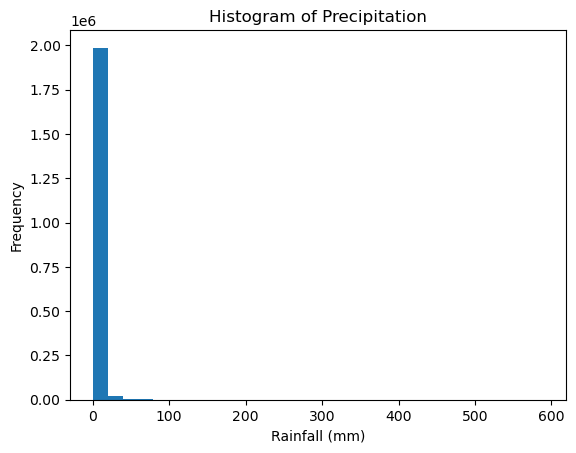

25.75073216536621


In [17]:
import matplotlib.pyplot as plt

plt.hist(df['precipitation_mm'], bins=30)
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')
plt.title('Histogram of Precipitation')
plt.show()
print(df['precipitation_mm'].skew())


This graph shows that the precipitation data is skewed and type of skewed is right skewed because all data in 1 side and there is possiblity that  the data have outliers and imbalanced.

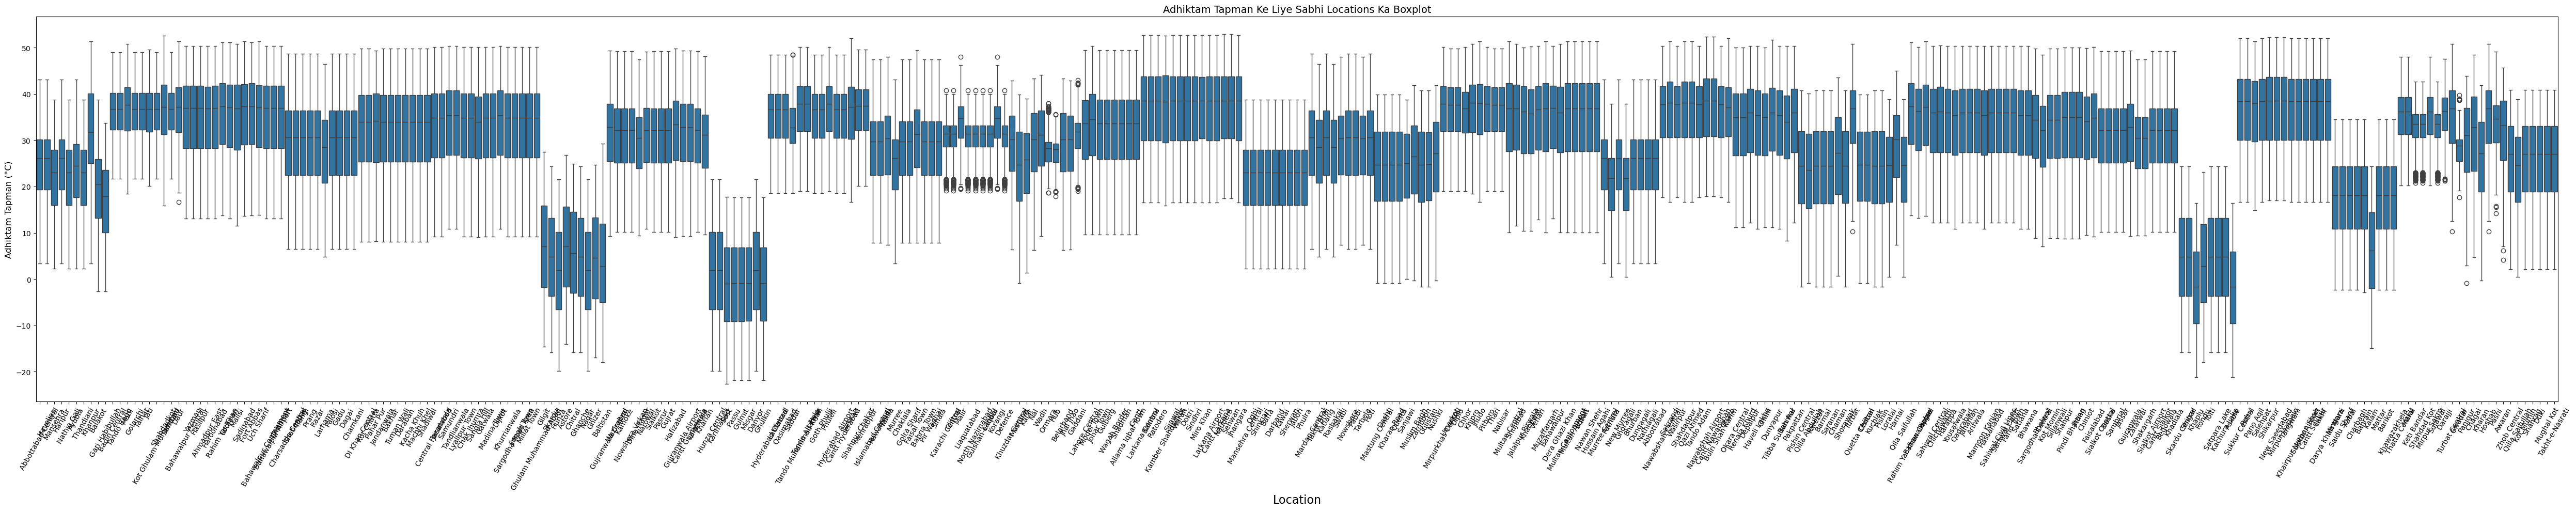

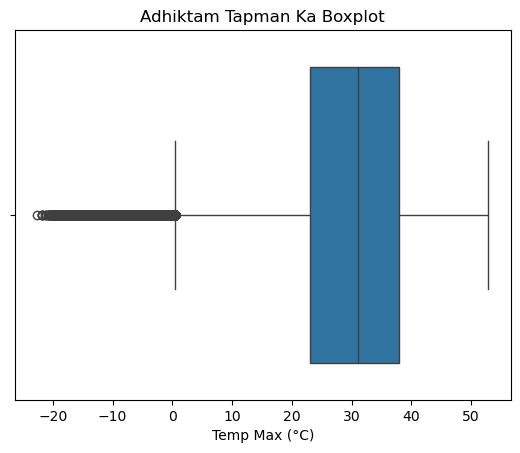

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size (width, height) in inches
plt.figure(figsize=(50, 10))  # Width = 12 inches, Height = 6 inches

# Create a grouped boxplot by 'Location'
sns.boxplot(x='Location', y='temp_max_c', data=df)

# Title and labels
plt.title('Adhiktam Tapman Ke Liye Sabhi Locations Ka Boxplot', fontsize=14)
plt.xlabel('Location', fontsize=16)
plt.ylabel('Adhiktam Tapman (°C)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=60)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()



# without Locations
sns.boxplot(x=df['temp_max_c'])
plt.title('Adhiktam Tapman Ka Boxplot')
plt.xlabel('Temp Max (°C)')
plt.show()

The graph shows that the average temperature is between 25 C to 36 C . There is an outlier -20 C to approx 0 C


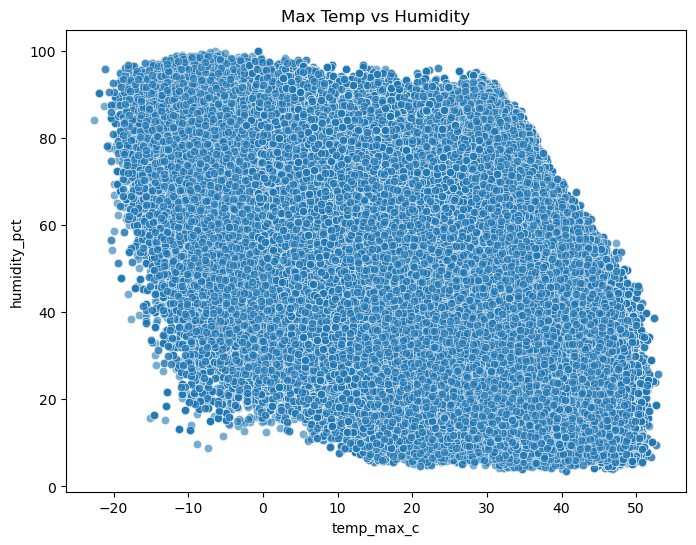

In [19]:
# Scatter plot of temp_max vs humidity
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='temp_max_c', y='humidity_pct', alpha=0.6)
plt.title('Max Temp vs Humidity')
plt.show()

This Graph shows that Temperature increases then humidity also increases (directly proportional relation) beacuse i can see that temperature increases humidity increases.

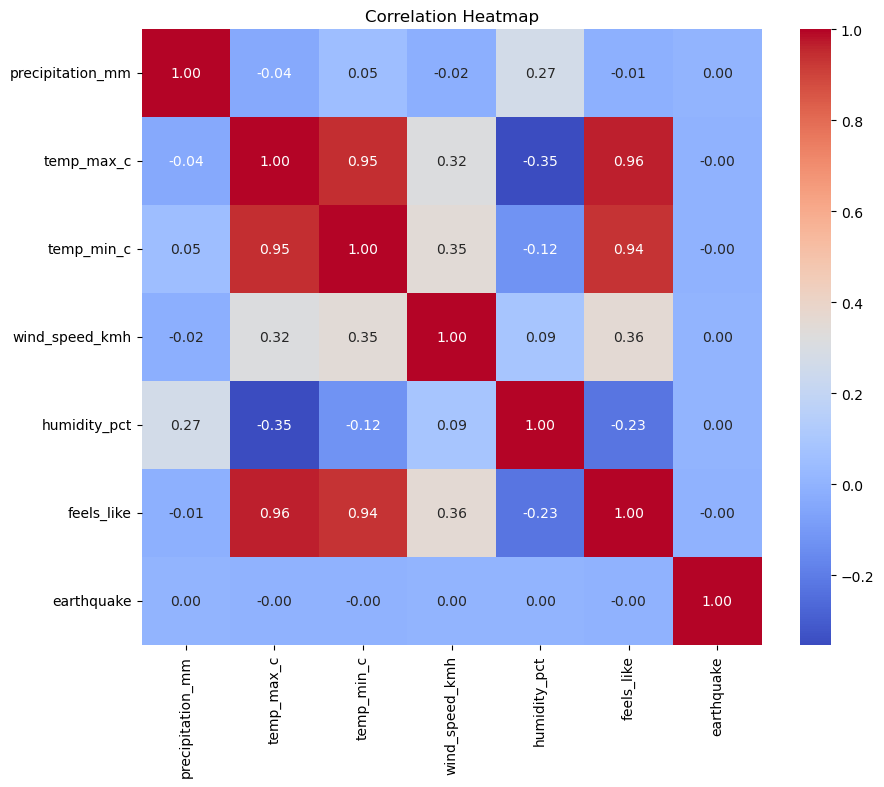

In [20]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

C:\Users\1111172045.uitu\AppData\Local\Temp\ipykernel_3036\3014055930.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Location', y='temp_max_c', ci=None)


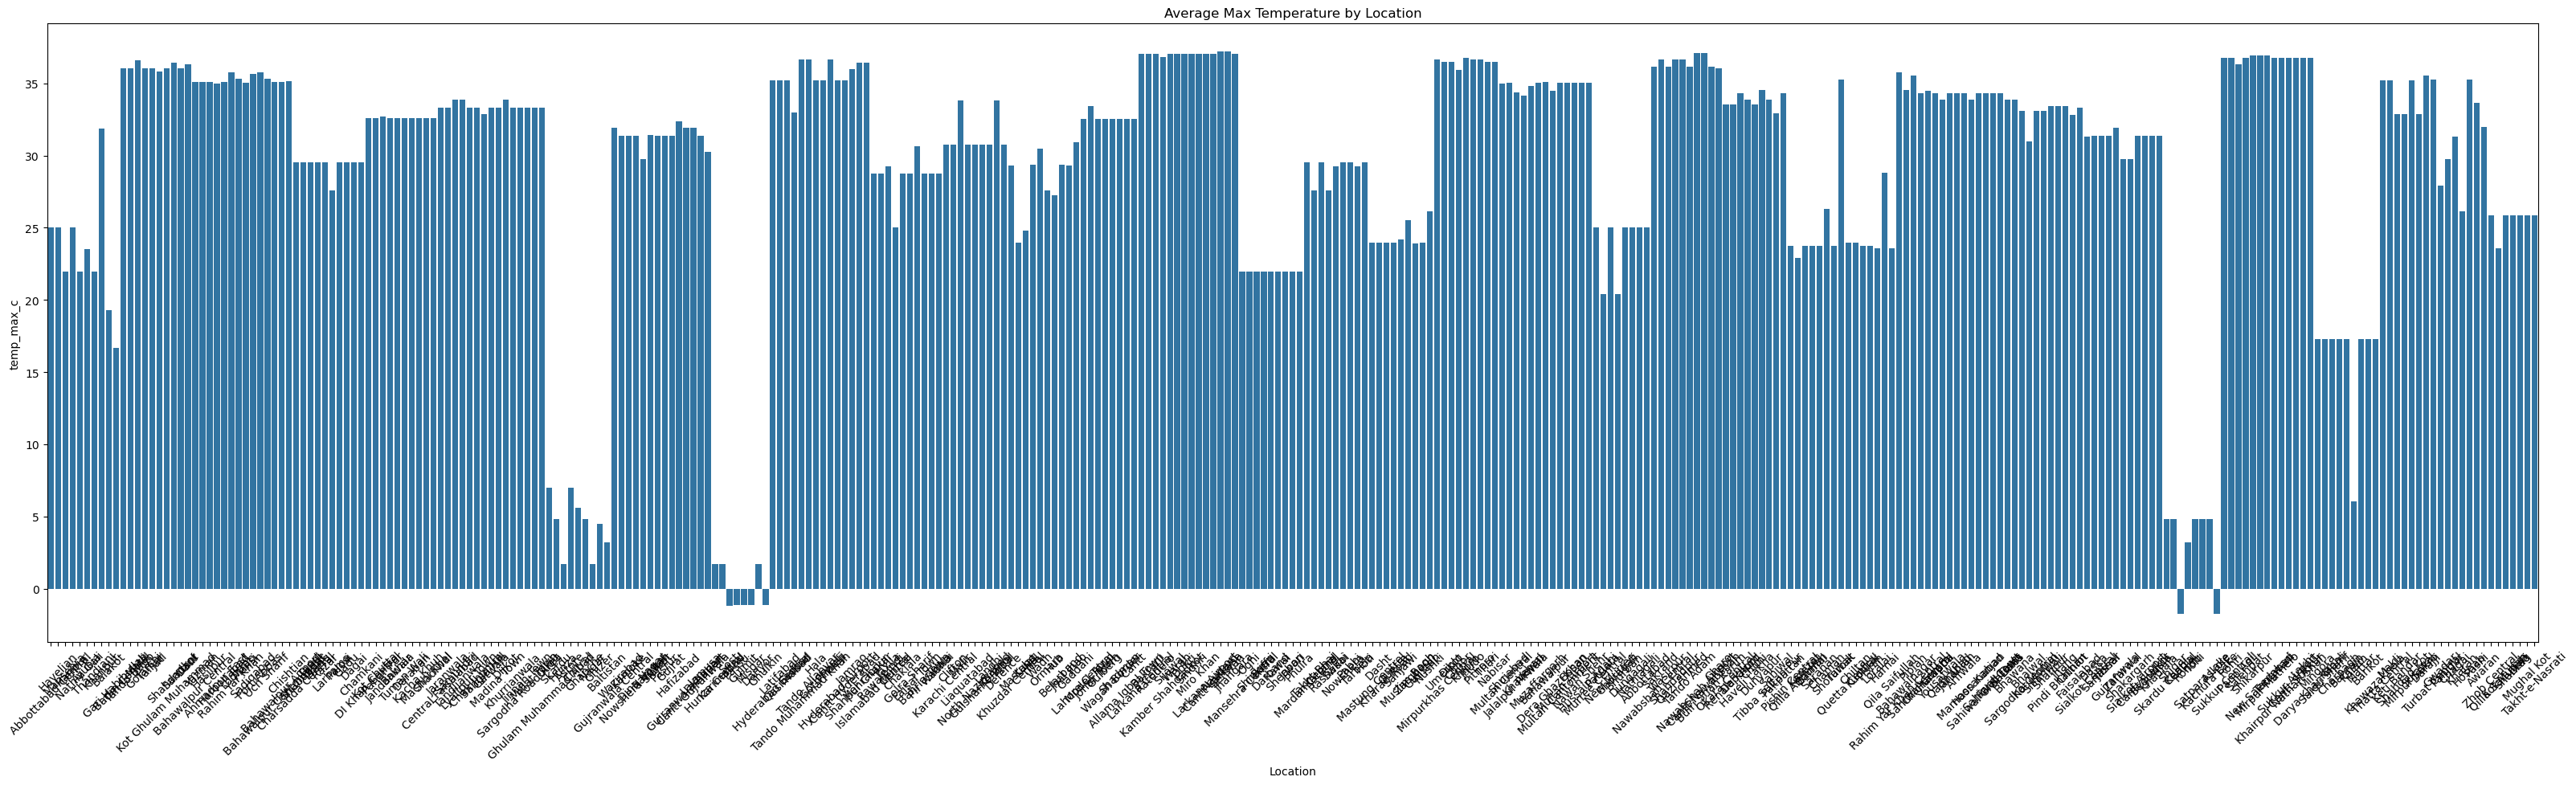

C:\Users\1111172045.uitu\AppData\Local\Temp\ipykernel_3036\3014055930.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='events', y='precipitation_mm', ci=None,


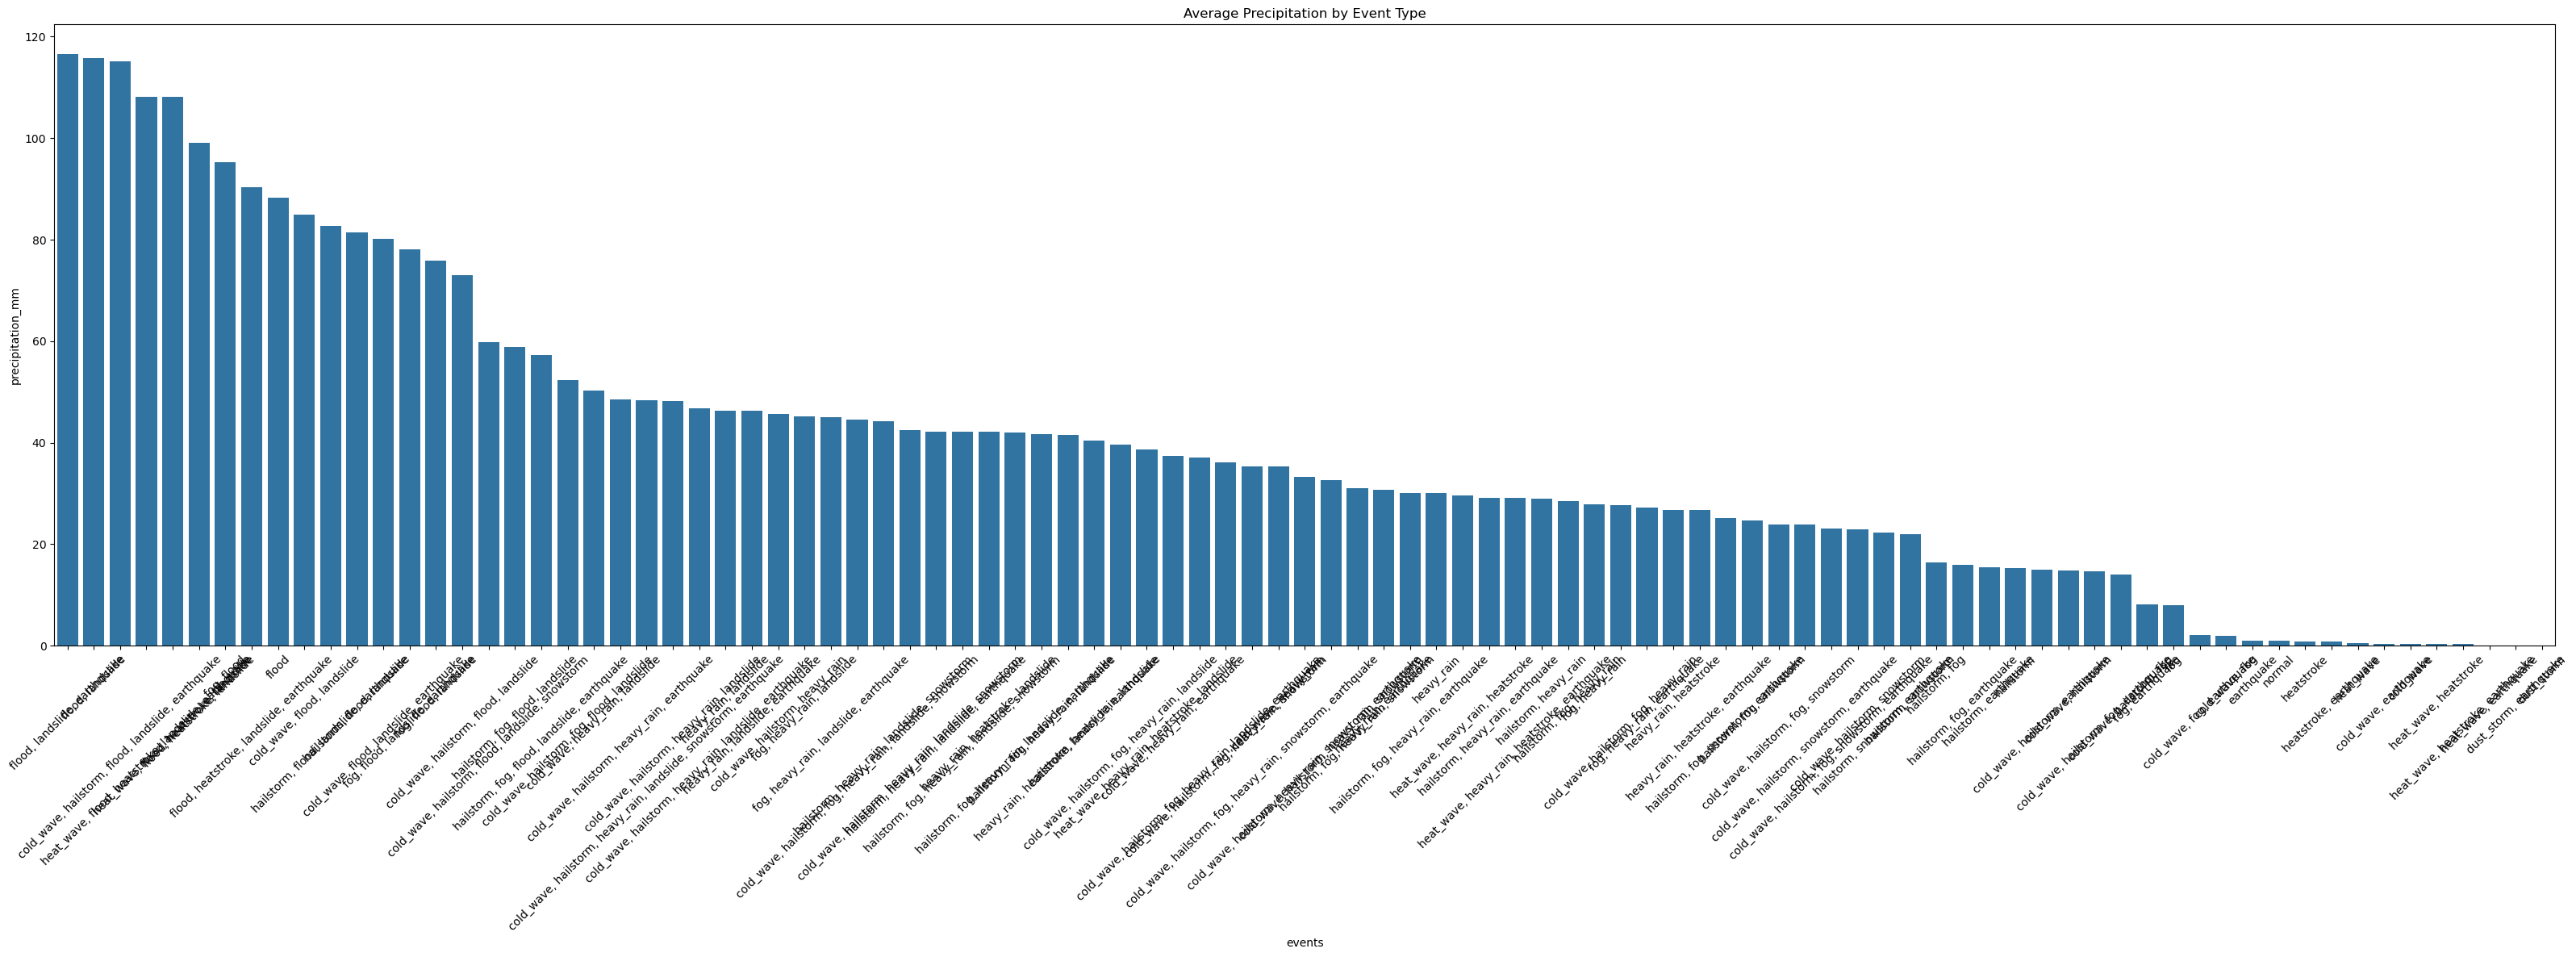

In [21]:
# Average max temperature by location
plt.figure(figsize=(40,10))
sns.barplot(data=df, x='Location', y='temp_max_c', ci=None)
plt.title('Average Max Temperature by Location')
plt.xticks(rotation=45)
plt.show()

# Average precipitation by event type
plt.figure(figsize=(40,10))
sns.barplot(data=df, x='events', y='precipitation_mm', ci=None,
            order=df.groupby('events')['precipitation_mm'].mean().sort_values(ascending=False).index)
plt.title('Average Precipitation by Event Type')
plt.xticks(rotation=45)
plt.show()

C:\Users\1111172045.uitu\AppData\Local\Temp\ipykernel_3036\151871613.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Location', y='Total Occurrences', data=summary, palette='Blues_d')


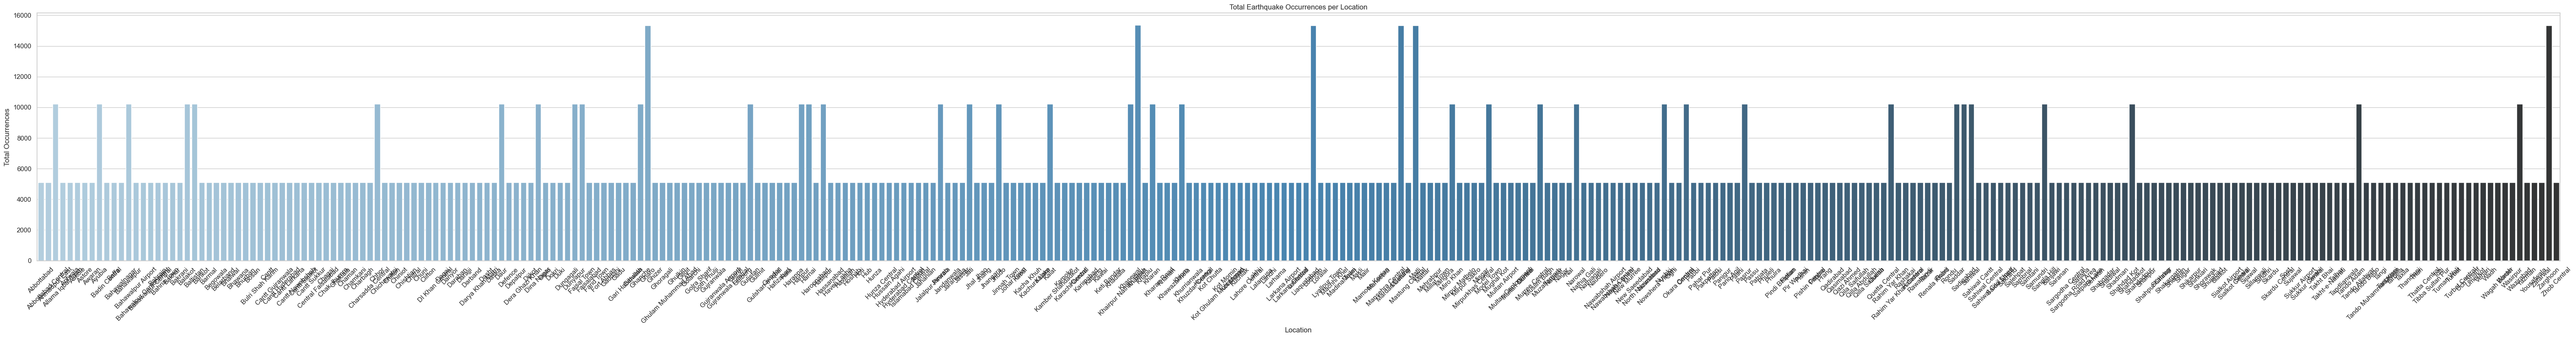

C:\Users\1111172045.uitu\AppData\Local\Temp\ipykernel_3036\151871613.py:25: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
D:\Anaconda1\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


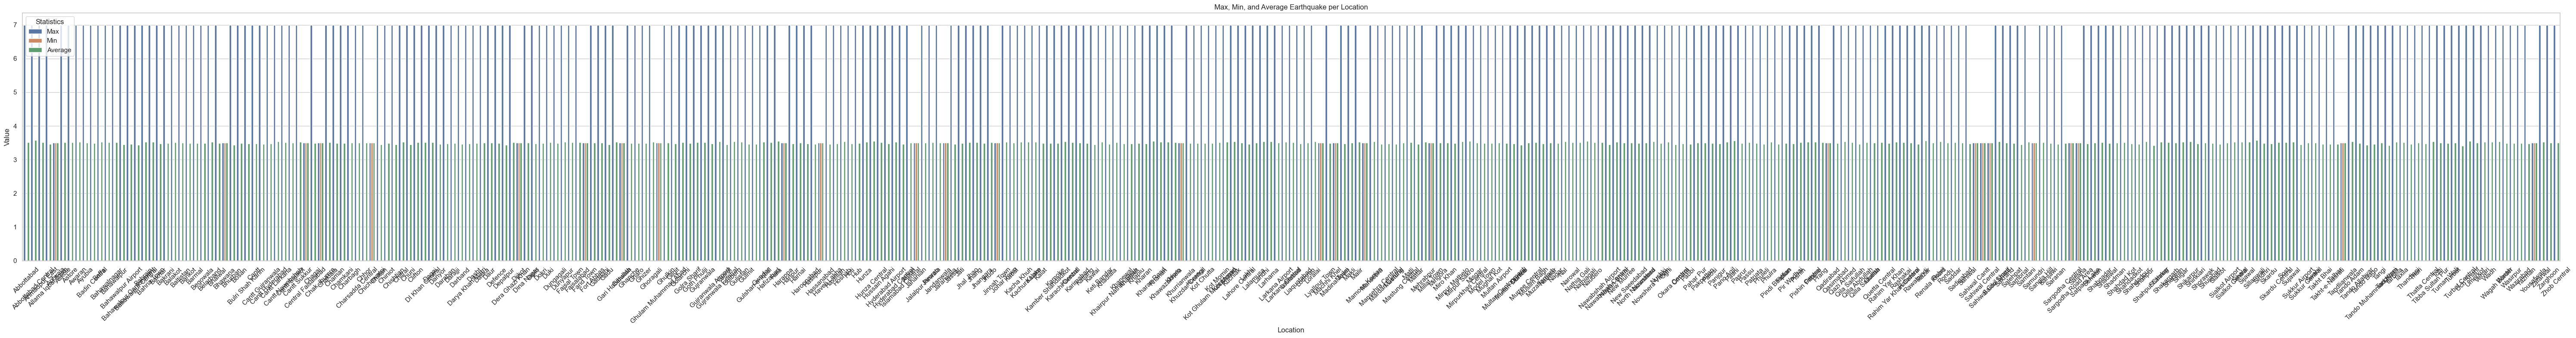

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('merged_data.csv')
summary = df.groupby('Location')['earthquake'].agg(['count', 'max', 'min', 'mean']).reset_index()
summary.rename(columns={'count': 'Total Occurrences', 'max': 'Max', 'min': 'Min', 'mean': 'Average'}, inplace=True)
sns.set(style="whitegrid")

# Diagram1: Total Earthquake Occurrences per Location
plt.figure(figsize=(60, 8))
sns.barplot(x='Location', y='Total Occurrences', data=summary, palette='Blues_d')
plt.title('Total Earthquake Occurrences per Location')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Diagram2: Max, Min, and Average Earthquake values per Location
plt.figure(figsize=(60, 8))
summary_melted = summary.melt(id_vars='Location', value_vars=['Max', 'Min', 'Average'], 
                              var_name='Stat', value_name='Value')
sns.barplot(x='Location', y='Value', hue='Stat', data=summary_melted)
plt.title('Max, Min, and Average Earthquake per Location')
plt.xticks(rotation=45)
plt.legend(title='Statistics')
plt.tight_layout()
plt.show()


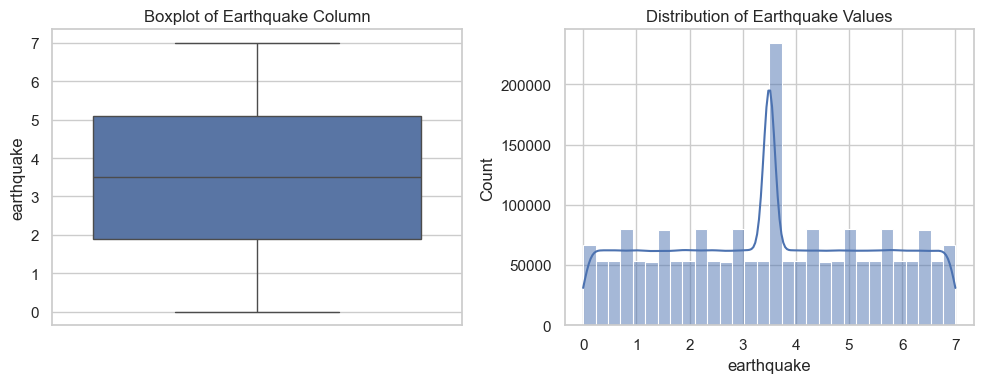

In [23]:
# Detect Outliers
plt.figure(figsize=(10, 4))

# Boxplot to detect outliers
plt.subplot(1, 2, 1)
sns.boxplot(y=df['earthquake'])
plt.title('Boxplot of Earthquake Column')

# Histogram to see overall distribution
plt.subplot(1, 2, 2)
sns.histplot(df['earthquake'], kde=True, bins=30)
plt.title('Distribution of Earthquake Values')

plt.tight_layout()
plt.show()


# Preprocessing

## 1- Missing Data Handling

In [24]:
df.isnull().sum()

Date                0
precipitation_mm    0
temp_max_c          0
temp_min_c          0
wind_speed_kmh      0
humidity_pct        0
feels_like          0
earthquake          0
events              0
Location            0
dtype: int64

There is no missing values

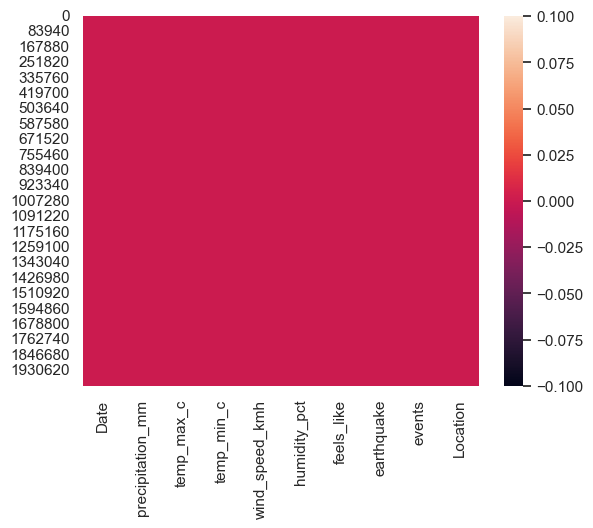

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull())
plt.show()

This diagram indicates that there is no missing values (pink color denotes 0.000).

In [26]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

We have to convert date into date/time then we will used for  time-based features like month, day of week, etc.

Feature Engineering

In [27]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df = df.drop('Date', axis=1)  # Ab Date ko remove kardo

Label Encoding

In [55]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])
# df['events'] = le.fit_transform(df['events'])

df['earthquake'] = df['earthquake'].apply(lambda x: 1 if x > 3 else 0)

df.head()

precipitation_mm  temp_max_c  temp_min_c  wind_speed_kmh  humidity_pct  \
0               0.0        19.8         4.5             4.8          18.0   
1               0.0        18.6         4.8             5.6          21.0   
2               0.4        10.0         3.6             3.2          48.3   
3               0.0        15.7         3.0             5.4          47.9   
4               0.0        21.1         5.7             5.5          23.6   

   feels_like  earthquake  events  Location  Year  Month  Day  
0        18.9           0      94         1  2010      1    1  
1        17.7           0      94         1  2010      1    2  
2         9.2           0      94         1  2010      1    3  
3        14.8           0      94         1  2010      1    4  
4        22.4           0      37         1  2010      1    5

we can apply label encoding which means per location gives unique number. It is important to concert categorical into numerical column.

## Feature Selection

In [29]:
# Define X and y
X = df.drop(['earthquake', 'Location'], axis=1)
y = df['earthquake']

- This line prepares the input and output for the model.
- X contains all the columns except 'earthquake' and 'Location'.
- y contains only the target column 'earthquake'.
- 'earthquake' is what we want to predict.
- 'Location' is removed because it’s not needed for training.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data (important for PCA and Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

- The code splits the data into training and testing sets (80% train, 20% test).
- Then it scales the feature values using StandardScaler.
- Scaling makes all features have the same range (mean = 0, std = 1).
- This is important for models like PCA and Logistic Regression.
- It helps the model learn better and faster.

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

importances = rf.feature_importances_
for name, imp in zip(X.columns, importances):
    print(f"{name}: {imp:.4f}")

precipitation_mm: 0.0264
temp_max_c: 0.0818
temp_min_c: 0.0867
wind_speed_kmh: 0.0741
humidity_pct: 0.0858
feels_like: 0.1523
events: 0.3743
Year: 0.0383
Month: 0.0258
Day: 0.0546


### Working of Random Forest Classifier

1) Uses multiple decision trees (a forest)
2) Each tree is trained on random data samples
3) Each tree uses random features
4) All trees predict separately
5) Final prediction is made by majority voting
6) Reduces overfitting compared to a single tree
7) Works well on large and complex datasets
8) Good for both classification and regression tasks

According to my understanding, there is only 1 relation that is events .

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("PC1 Weights:")
for name, weight in zip(X.columns, pca.components_[0]):
    print(f"{name}: {weight:.4f}")

Explained Variance Ratio: [0.3275138  0.13565664 0.10828362 0.10003907]
PC1 Weights:
precipitation_mm: -0.0242
temp_max_c: 0.5405
temp_min_c: 0.5265
wind_speed_kmh: 0.2350
humidity_pct: -0.1718
feels_like: 0.5339
events: 0.2314
Year: -0.0215
Month: 0.0789
Day: 0.0048


### PCA (Principal Component Analysis) 

1) pca is a dimensionality reduction technique
2) it reduces the number of features while keeping important information
3) it creates new features called principal components
4) principal components are combinations of original features
5) the first component captures the most variance (important info)
6) the second component captures the next most, and so on
7) it helps in speeding up models and removing noise
8) it is useful for visualization and performance improvement
9) data should be scaled before applying pca
10) pca is an unsupervised method (does not use labels)

According to my understanding, there is only 1 relation that is events .

In [33]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X_train_scaled, y_train, random_state=42)
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)
print(mi_df)

            Feature  MI Score
6            events  0.252476
5        feels_like  0.037166
0  precipitation_mm  0.016186
8             Month  0.014137
7              Year  0.011486
9               Day  0.005229
3    wind_speed_kmh  0.001834
2        temp_min_c  0.001611
4      humidity_pct  0.000707
1        temp_max_c  0.000195


### mutual_info_classif – Working 

1) mutual_info_classif is a feature selection method
2) it measures the relationship between each feature and the target
3) it tells how much information a feature gives about the output
4) higher value means the feature is more useful
5) it works for classification problems
6) it is based on mutual information from information theory
7) it can capture non-linear relationships
8) it does not assume any specific data distribution
9) used to select the most relevant features
10) it is available in sklearn’s feature\_selection module

According to my understanding, there is only 1 relation that is events .
#### Summary
According to my results , comparing computer results and domain knowledge (there is no important feature but event is less important not important.)

## Resampling

In [34]:
import pandas as pd

# Count of 0s and 1s in 'earthquake' column
class_counts = y.value_counts()

print("Class distribution:")
print(class_counts)

# Optional: Percentage bhi dekh len
print("\nPercentage distribution:")
print(y.value_counts(normalize=True) * 100)

Class distribution:
earthquake
1    1204053
0     810504
Name: count, dtype: int64

Percentage distribution:
earthquake
1    59.767631
0    40.232369
Name: proportion, dtype: float64


To check my target values is balance or not . If imbalanced then then the result is not accurate and i saw that the target values is imbalanced so i applied resampling to balance my target values and then predict accurately.

In [35]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("After oversampling:")
print(y_res.value_counts())

After oversampling:
earthquake
1    1204053
0    1204053
Name: count, dtype: int64


To check 1 or 0 are equal or not (Resampling results) . The target values is finally balanced now we will go to apply model.

# Apply Model


================== Logistic Regression ==================
Accuracy: 0.6742638591057104

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.84      0.68    162101
           1       0.84      0.56      0.67    240811

    accuracy                           0.67    402912
   macro avg       0.70      0.70      0.67    402912
weighted avg       0.73      0.67      0.67    402912



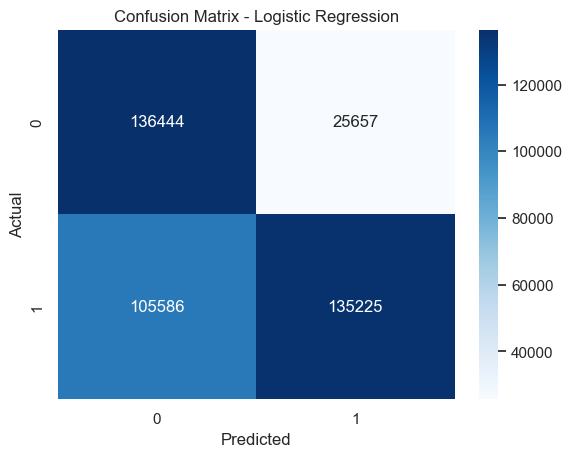


================== Random Forest ==================
Accuracy: 0.7062807759510762

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.75      0.67    162101
           1       0.80      0.67      0.73    240811

    accuracy                           0.71    402912
   macro avg       0.71      0.71      0.70    402912
weighted avg       0.72      0.71      0.71    402912



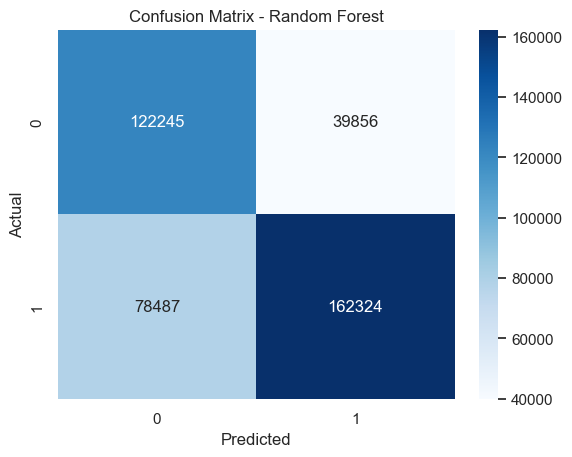

D:\Anaconda1\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:23:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



================== XGBoost ==================
Accuracy: 0.741223890080216

Classification Report:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76    162101
           1       1.00      0.57      0.72    240811

    accuracy                           0.74    402912
   macro avg       0.80      0.78      0.74    402912
weighted avg       0.84      0.74      0.74    402912



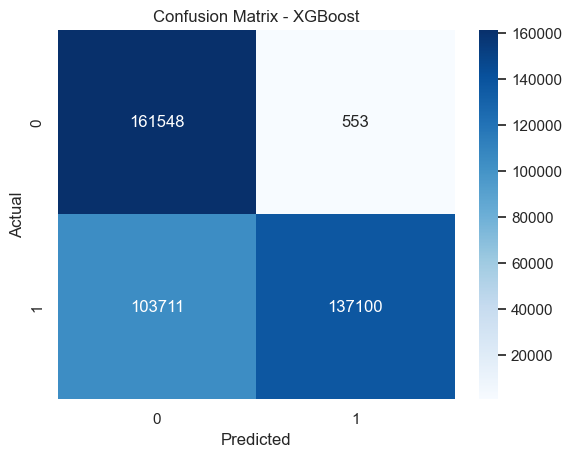

In [36]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE for resampling
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    model.fit(X_res, y_res)
    y_pred = model.predict(X_test)
    
    print(f"\n================== {name} ==================")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix Plot
    conf_mat = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'report': classification_report(y_test, y_pred, output_dict=True)
    }

##  Working of Logistic Regression
1) Takes input like temperature, humidity, wind speed, etc.
2) Learns from data to find patterns between these features and earthquake (yes or no).
3) Makes prediction by calculating the chance (probability) of an earthquake.
4) If chance is more than 50%, it says "earthquake will happen", otherwise "no earthquake".
5) It draws a straight line to separate the two cases.

### Summary of Logistic Regression Results (in English):
Accuracy (67.4%): The model correctly predicts whether an earthquake will occur or not about 67.4% of the time.
Precision (84% for earthquakes): When the model predicts an earthquake, it is correct 84% of the time — meaning few false alarms.
Recall (56% for earthquakes): The model catches only 56% of actual earthquakes — meaning it misses many real earthquakes.
F1-Score (~67%): A balance between precision and recall — indicates average performance.

##  Working of Random Forest (Simple Explanation)
1) Random Forest is a group (or “forest”) of many decision trees.
2) Each tree learns to predict earthquake (yes/no) using random parts of data and random features.
3) Trees make their own predictions separately.
4) Random Forest combines (votes) all these tree predictions to make the final decision — majority wins.
5) This helps reduce mistakes and overfitting, making the model more accurate and stable.

### Summary of Your Random Forest Results:
Accuracy: 70.6% — better than Logistic Regression.
Precision (earthquake): 80% — when it predicts earthquake, it’s right 80% of the time (few false alarms).
Recall (earthquake): 67% — catches 67% of actual earthquakes (better than logistic regression).
F1-score (earthquake): 73% — good balance between precision and recall.

##  Working of XGBoost (Simple Explanation)
1) XGBoost is a powerful machine learning method based on boosted decision trees.
2) It builds many trees one by one, where each new tree tries to fix the mistakes of the previous trees.
3) It combines all these trees to make a strong final prediction.
4) Uses weighted data and clever math to focus more on hard-to-predict examples.
5) It is very efficient and often gives better results than simple models.

### Summary of Your XGBoost Results:
Accuracy: 74.1% — best among your models so far.
Precision for class 1 (earthquake): 100% — when it predicts earthquake, it is always correct (no false alarms).
Recall for class 1: 57% — detects 57% of real earthquakes (still missing some).
F1-score for class 1: 72% — good balance between precision and recall.
For class 0 (no earthquake), recall is perfect (100%) — model rarely misses non-earthquakes.

# Model Saved

In [37]:
import joblib

# Save model
joblib.dump(models, 'xgboost_model.pkl')

# Save scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

Model is saved through joblib.

# Prediction

In [70]:
def predict_earthquake(location):
    try:
        encoded_loc = le.transform([location])[0]
    except ValueError:
        print(f"❌ '{location}' not found in dataset.")
        print("Available Locations:", list(le.classes_))
        return

    # Get data for this location
    loc_data = df[df['Location'] == encoded_loc]

    if loc_data.empty:
        print(f"⚠️ No data found for {location}")
        return

    # Prepare input for model
    X_input = loc_data.drop(['earthquake', 'Location'], axis=1)
    X_input_scaled = scaler.transform(X_input)

    # Predict
    prediction = model.predict(X_input_scaled)
    prob = model.predict_proba(X_input_scaled)[0][1]

    # Result
    if prediction[0] == 1:
        print(f"✅ {location} me earthquake ka chance hai. ({prob:.2%})")
    else:
        print(f"❌ {location} me earthquake ka koi chance nahi hai. ({1 - prob:.2%})")
predict_earthquake("200")

❌ 200 me earthquake ka koi chance nahi hai. (87.09%)


Finally, Earthquake is predicted with yes or no answer with probablity and location is encoded with unique numbers . Starting encoded location 1 till ...